# Clustering


The objective of this project is to perform clustering of metasNim data

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn.datasets.samples_generator import make_blobs
# sklearn includes kmeans algorithm
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.mixture import GaussianMixture as GMM

In [3]:
#read the wdbc.csv
wdbc = pd.read_csv('./wdbc.csv',header=None)
wdbc.head(5)

,0,1,2,3,4,5,6,7,8,9,...,23803,23804,23805,23806,23807,23808,23809,23810,23811,23812
0,NaN,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,...,ENSG00000288064,ENSG00000288108,ENSG00000288436,ENSG00000288473,ENSG00000288533,ENSG00000288547,ENSG00000288564,ENSG00000288587,Id,Condition
1,19ID00558,0,0,0,2362,2557,1154,7446,0,0,...,10,0,419,0,0,350,0,0,19ID00558,0
2,19ID00559,0,0,0,1994,1874,753,6977,0,0,...,12,121,306,0,0,225,0,0,19ID00559,0
3,19ID00560,0,0,0,2380,2084,1095,9058,0,0,...,9,0,361,0,0,372,0,0,19ID00560,0
4,19ID00561,0,0,0,2674,2797,1092,8902,0,0,...,14,0,388,0,0,325,0,0,19ID00561,0


In [9]:
wdbc.shape

(24, 23813)

<font color='black'>b) Perform a PCA analysis over the data

</font> 

In [25]:
import pandas as pd
# convert the data to type float and drop the label col(B/M)
df_wdbc = wdbc.values[1:, 2:-2].astype(np.float)

# standardize the data before performing PCA
df_wdbc_std = sklearn.preprocessing.StandardScaler().fit_transform(df_wdbc)

#Get the number of components in the data
n_components=df_wdbc_std.shape[0]
wdbc_pca = PCA(n_components=n_components)

# project the data into this new PCA space
wdbc_pca.fit(df_wdbc_std )
df_wdbc_pca = wdbc_pca.transform(df_wdbc_std)

#To get the nubmer of components required to maintain 99% variance
#store the variance of all the components in the object var
var = np.cumsum(wdbc_pca.explained_variance_ratio_)

#initialize the counter 
counter = 1
for item in var:
    if item <= 0.99:
        counter = counter + 1
    else:
        break
        
print("Number of components:", counter, "    Variance:", var[counter-1])

Number of components: 20     Variance: 0.9921208893148308


In [12]:
df_wdbc = wdbc.values[1:, 2:-2].astype(np.float)

In [15]:
# standardize the data before performing PCA
df_wdbc_std = sklearn.preprocessing.StandardScaler().fit_transform(df_wdbc)

#Get the number of components in the data
n_components=df_wdbc_std.shape[1]
wdbc_pca = PCA(n_components=n_components)

In [24]:
df_wdbc_std.shape[0]


23

<font color='black'>c) Project the data into the PC space

</font> 



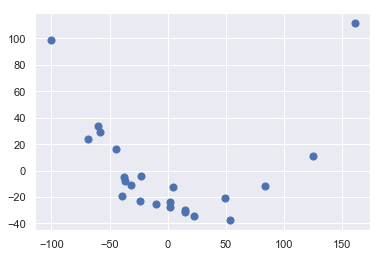

In [26]:
# define the number of components of the PCA domain
n_components=counter
#For all the data
#n_components=df_wdbc_std.shape[1]
wdbc_pca = PCA(n_components=n_components)

# project the data into this new PCA space
wdbc_pca.fit(df_wdbc_std )
df_wdbc_pca = wdbc_pca.transform(df_wdbc_std)

# convert dataframe to array
wdbc_data=np.array(df_wdbc_pca)
#print(wdbc_data)

# plot first 17 (from the counter value) PC without labels
plt.scatter(wdbc_data[:, 0], wdbc_data[:, 1], s=50, cmap='viridis');

<font color='black'>d) Apply both k-means and GMM over the projected data; 

</font> 


The center corrdinates for the green cluster are X= -18.490989458210763 Y= -5.546103730472867
The center corrdinates for the brown cluster are X= 123.27326305473849 Y= 36.97402486981908


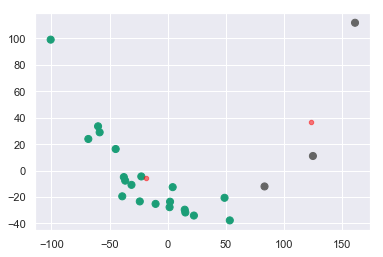

In [33]:
# perform k-means clustering
# 2 clusters are selected as there are 2 labels in our data
kmeans = KMeans(n_clusters=2)

# estimate model parameters with the EM algorithm 
kmeans.fit(wdbc_data)

# predict the closest cluster each sample in wdbc_data belongs to
y_kmeans = kmeans.predict(wdbc_data)

# plot the original data and the predicted clusters
plt.scatter(wdbc_data[:, 0], wdbc_data[:, 1], c=y_kmeans, s=50, cmap='Dark2')

# plot the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=20, alpha=0.5);

#print(centers[:, 0], centers[:, 1])
print("The center corrdinates for the green cluster are X=",centers[:, 0][0],"Y=",centers[:, 1][0])
print("The center corrdinates for the brown cluster are X=",centers[:, 0][1],"Y=",centers[:, 1][1])

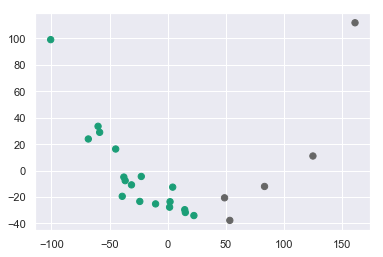

In [38]:
# perform GMM for clustering
# two gaussian functions as we have two original data labels
gmm = GMM(n_components=2).fit(wdbc_data)

# predict the labels for the data samples in X using trained model
labels = gmm.predict(wdbc_data)
plt.scatter(wdbc_data[:, 0], wdbc_data[:, 1], c=labels, s=40, cmap='Dark2');

In [39]:
labels

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int64)

In [30]:
wdbc_data

array([[ 1.52505674e+01, -3.16809313e+01,  2.68584456e+01,
         2.36585149e+01,  1.57822474e+01,  3.97435981e+00,
         3.81045682e+01, -5.07889392e+00, -3.65638081e+00,
        -4.07806156e-01, -4.46416915e+00,  2.19966956e+01,
        -2.23756605e+00,  1.08147240e+01,  3.88701073e+00,
         6.47914601e+00, -7.60020409e+00,  1.00130481e+01,
        -1.83880695e+00, -8.65566996e+00],
       [ 5.35363391e+01, -3.76610950e+01, -2.56691332e+01,
         1.17108713e+01,  1.53468402e+01, -8.23983525e+00,
         3.19850664e+01, -3.60593476e+00, -1.85383086e+01,
        -3.70948033e+00, -5.70855155e+00, -8.37620638e+00,
         2.56445544e+00, -1.89628499e+01, -5.33025475e+00,
        -9.12564007e+00, -1.00498142e+01, -8.59482608e+00,
        -6.00961509e+00, -2.22547528e-01],
       [ 2.10123760e+00, -2.35170873e+01, -9.39369863e+00,
        -2.19639368e+01,  2.12611089e+01, -4.63917784e+00,
        -3.72727970e+00,  5.29775864e+00, -5.06119597e+00,
         8.88951478e-01, -4.3

In [53]:
df_wdbc_std[:,23812]

IndexError: index 23812 is out of bounds for axis 1 with size 23809

In [47]:
df_wdbc_std.shape

(23, 23809)

<br>
<font color='red'>ADD YOUR ANALYSIS</font> 
<br>
<br>
From comparing the two graphs, k-means splits the data almost perfectly into two distinct groups. This is because k-means groups the points based on the distance from the center. Comparing this to the GMM's graph, it is clear to see that there is some overlapping of the two colours. This is due to the fact that GMM is an algorithm for density estimation.
<br>

Both methods, in this case, use two components to label the data as the original data had labels of either Begin or Malignant (B/M). The data being used (wdbc_data) is based on 17 components which gave a variance of 99.1%.
<Br>
In terms of which method is better for our data, in my opinion, I would choose GMM. The data is relating to weather a tumour is Benign or Malignant and GMM gives the probability of the tumour belonging to either group. K-means classifies the groups by distance from the randomly chosen center point which may lead to an increased number of misclassifications. 
<br>
<br>